In [3]:
# Ref: https://www.kaggle.com/roshansharma/online-shopper-s-intention

In [5]:
import pandas as pd
import numpy as np

import os

import matplotlib.pyplot as plt
import seaborn as sns

import plotly as py
import plotly.graph_objs as go

In [8]:
df = pd.read_csv('raw-data/online_shoppers_intention.csv')
df.shape

(12330, 18)

In [10]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [31]:
list(df)

['Administrative',
 'Administrative_Duration',
 'Informational',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues',
 'SpecialDay',
 'Month',
 'OperatingSystems',
 'Browser',
 'Region',
 'TrafficType',
 'VisitorType',
 'Weekend',
 'Revenue']

In [32]:
len(list(df))

18

In [11]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.317798,80.906176,0.503979,34.506387,31.763884,1196.037057,0.022152,0.043003,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.322754,176.860432,1.270701,140.825479,44.490339,1914.372511,0.048427,0.048527,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,185.000000,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,8.000000,0.000000,0.000000,18.000000,599.766190,0.003119,0.025124,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.500000,0.000000,0.000000,38.000000,1466.479902,0.016684,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


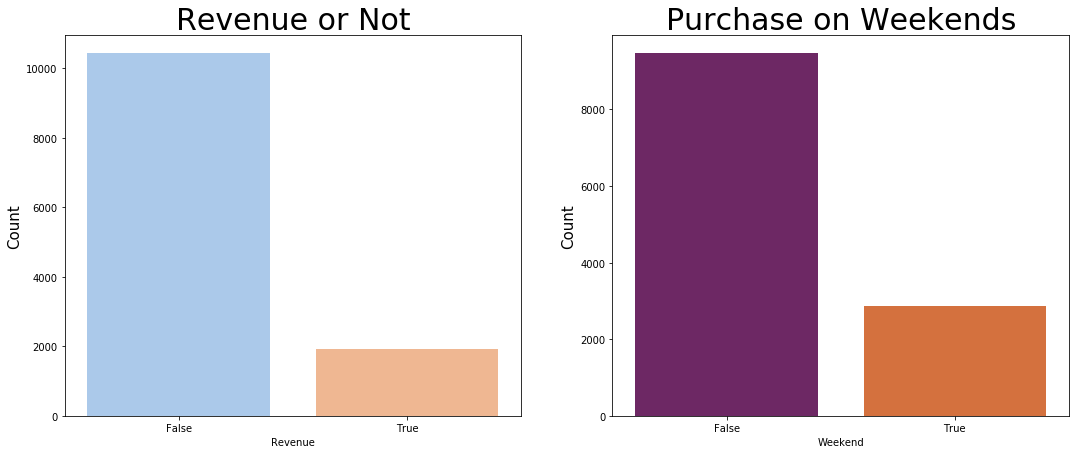

In [26]:
# Uni-Variate Analysis of the Data
plt.rcParams['figure.figsize'] = (18, 7)

# Distribution of customers on Revenue
plt.subplot(1, 2, 1)
sns.countplot(df['Revenue'], palette = 'pastel')
plt.title('Revenue or Not', fontsize = 30)
# plt.xlabel('Revenue or not', fontsize = 15)
plt.ylabel('Count', fontsize = 15)


# Distribution of customers on Weekend
plt.subplot(1, 2, 2)
sns.countplot(df['Weekend'], palette = 'inferno')
plt.title('Purchase on Weekends', fontsize = 30)
# plt.xlabel('Weekend or not', fontsize = 15)
plt.ylabel('Count', fontsize = 15)


plt.show()

In [42]:
df['VisitorType'].value_counts()

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

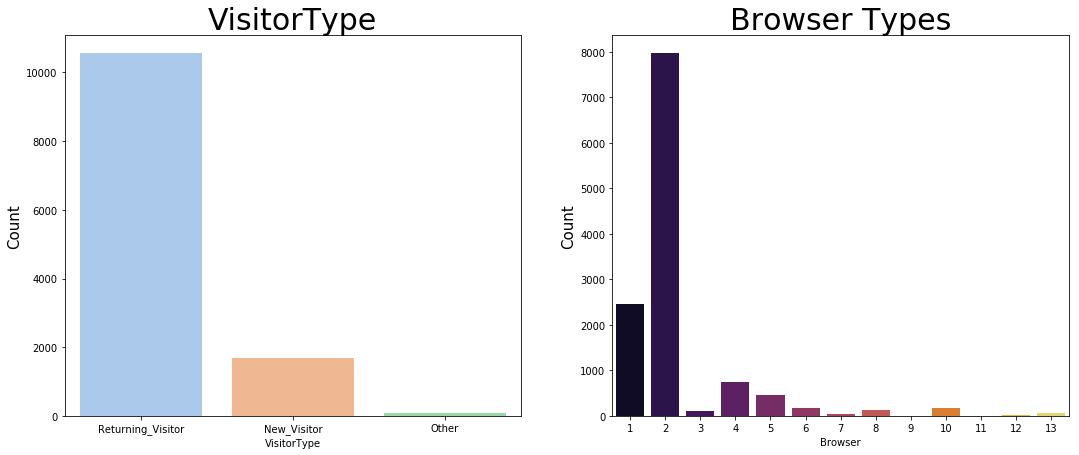

In [35]:
plt.rcParams['figure.figsize'] = (18, 7)

# Distribution of VisitorType
plt.subplot(1, 2, 1)
sns.countplot(df['VisitorType'], palette = 'pastel')
plt.title('VisitorType', fontsize = 30)
plt.ylabel('Count', fontsize = 15)


# Distribution of Browser
plt.subplot(1, 2, 2)
sns.countplot(df['Browser'], palette = 'inferno')
plt.title('Browser Types', fontsize = 30)
plt.ylabel('Count', fontsize = 15)


plt.show()

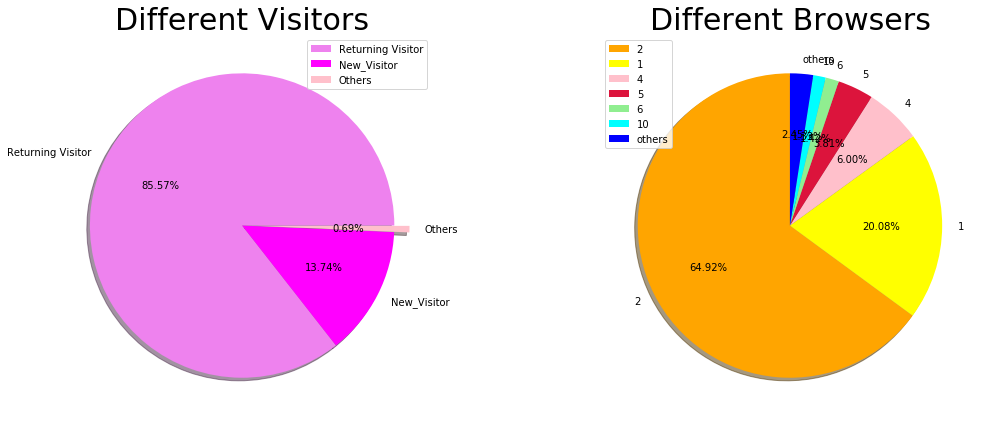